In [3]:
import requests
from bs4 import BeautifulSoup

In [23]:
r = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')
data = r.content            #import content of page to data     
soup = BeautifulSoup(data)      
print(soup.prettify())      #view data in nice format

<!DOCTYPE html>
<html lang="en"><head><script async="" src="https://polyfill.io/v3/polyfill.min.js"></script><link href="/pf/dist/styles/ae7d9e923aad6e086043.css?d=235" id="fusion-template-styles" rel="stylesheet" type="text/css"/><link href="/pf/resources/dist/cleveland/css/style.css?d=235" rel="stylesheet"/><script type="application/javascript">if(!Array.prototype.includes||!(window.Object && window.Object.assign)||!window.Promise||!window.Symbol||!window.fetch){document.write('<script type="application/javascript" src="/pf/dist/engine/polyfill.js?d=235" defer=""><\/script>')}</script><script defer="" id="fusion-engine-script" src="/pf/dist/engine/react.js?d=235" type="application/javascript"></script><script defer="" id="fusion-template-script" src="/pf/dist/template/article-cleveland/default.js?d=235" type="application/javascript"></script><link href="/pf/resources/images/cleveland/favicon.ico?d=235" rel="icon" type="image/x-icon"/><link href="/pf/resources/manifest/cleveland/manif

In [24]:
working_element  = soup.find('div', attrs = {'class': 'entry-content'})          #select working element from page
print(working_element.prettify())

<div class="entry-content"><p class="article__paragraph article__paragraph--left" id="UDT3SSNMTRCTFDQE6DBFNJODLI">CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p><p class="article__paragraph article__paragraph--left" id="AOJSWF2SO5F6NLAFYE77J7FAPI">Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p><div class="ad ad--in-article" id="InContent_Center_AOJSWF2SO5F6NLAFYE77J7FAPI"></div><p class="article__paragraph article__paragraph--left" id="F67RF4SFXRGCPECJF3ZBO2YYL4">She is among 58 presidents to earn $1 million or more. The previous year, 39 private college president

In [28]:
required_data =  working_element.find('ul').text               #get text data from 'ul' tag
print(required_data)

Grant Cornwell, College of Wooster (left in 2015): $911,651Marvin Krislov, Oberlin College (left in 2016):  $829,913Mark Roosevelt, Antioch College, (left in 2015): $507,672Laurie Joyner, Wittenberg University (left in 2015): $463,504Richard Giese, University of Mount Union (left in 2015): $453,800Sean Decatur,Kenyon College: $451,698Adam Weinberg, Denison University: $435,322Daniel Dibiasio, Ohio Northern University: $414,716Denvy Bowman, Capital University (left in 2016): $388,570Anne Steele, Muskingum University (left in 2016): $384,233Kathy Krendl, Otterbein University:  $378,035Rockwell Jones, Ohio Wesleyan University: $366,625Robert Helmer, Baldwin Wallace University: $365,616Robert Huntington, Heidelberg University: $300,005Lori Varlotta, Hiram College: $293,336Joseph Bruno, Marietta College (left in 2016): $288,295W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761


In [85]:
import re

name_pattern = re.findall(r"([A-Z]{1}.+?)(?:,)",required_data)         #regex for generating list having name start with A-Z
#print(name_pattern)                                                   #and having , but does not include it in result
name_list = name_pattern[::2]                                          #choosing list of name by slicing    
print(name_list)


['Grant Cornwell', 'Marvin Krislov', 'Mark Roosevelt', 'Laurie Joyner', 'Richard Giese', 'Sean Decatur', 'Adam Weinberg', 'Daniel Dibiasio', 'Denvy Bowman', 'Anne Steele', 'Kathy Krendl', 'Rockwell Jones', 'Robert Helmer', 'Robert Huntington', 'Lori Varlotta', 'Joseph Bruno', 'W. Richard Merriman Jr.']


In [132]:
salary_pattern = re.compile(r'[0-9]+,[0-9]+')             #regex for selecting salaries
salary_list = re.findall(salary_pattern,required_data)
print(salary_list)

['911,651', '829,913', '507,672', '463,504', '453,800', '451,698', '435,322', '414,716', '388,570', '384,233', '378,035', '366,625', '365,616', '300,005', '293,336', '288,295', '221,761']


In [133]:
import pandas as pd
data = {'name':name_list,'salary':salary_list}          #create dataframe from extracted data
df = pd.DataFrame(data)
print(df)

                       name   salary
0            Grant Cornwell  911,651
1            Marvin Krislov  829,913
2            Mark Roosevelt  507,672
3             Laurie Joyner  463,504
4             Richard Giese  453,800
5              Sean Decatur  451,698
6             Adam Weinberg  435,322
7           Daniel Dibiasio  414,716
8              Denvy Bowman  388,570
9               Anne Steele  384,233
10             Kathy Krendl  378,035
11           Rockwell Jones  366,625
12            Robert Helmer  365,616
13        Robert Huntington  300,005
14            Lori Varlotta  293,336
15             Joseph Bruno  288,295
16  W. Richard Merriman Jr.  221,761


In [145]:
df['salary'] = [int(''.join(s[0:].split(','))) for s in df['salary']] #convert values to numeric type from object

In [146]:
df['salary'].dtypes

dtype('int64')

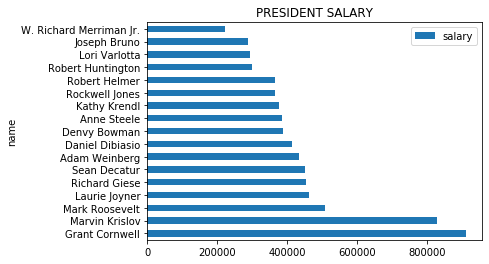

In [167]:
df.plot.barh('name','salary',title="PRESIDENT SALARY")      #plot salary vs name graph
